In [1]:
# standard imports
import numpy as np
import pandas as pd
# aquire data
from wrangle_zillow import wrangle_zillow
# split/scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = wrangle_zillow()

--- Shape: (77380, 68)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet

In [ ]:
def verify_duplicates(x,y):
    a = x.value_counts().sum()
    print(f'x total value count: {a}')
    b = x.isnull().sum()
    print(f'x total null count: {b}')
    print(f'x Value count + x null count: {a+b}')
    print('='*50)
    c = y.value_counts().sum()
    print(f'y total value count: {c}')
    d = y.isnull().sum()
    print(f'y total null count: {d}')
    print(f'y Value count + y null count: {c+d}')
    print('='*50)
    e = (x == y).value_counts()
    print(f'x = y: \n{e}')

In [3]:
df = df.rename(columns={'parcelid': 'parcel_id',
                  'bathroomcnt' : 'bathroom_cnt',
                  'bedroomcnt': 'bedroom_cnt',
                  'buildingqualitytypeid': 'building_quality_id',
                  'calculatedfinishedsquarefeet': 'area',
                  'fullbathcnt': 'full_bath_cnt',
                  'lotsizesquarefeet': 'lot_area',
                  'propertycountylandusecode': 'county_land_code',
                  'propertyzoningdesc': 'prop_zoning',
                  'rawcensustractandblock': 'census_tract_block_id',
                  'regionidcity': 'city_id',
                  'regionidcounty': 'county_id',
                  'regionidzip': 'zipcode',
                  'roomcnt': 'room_cnt',
                  'unitcnt': 'unit_cnt',
                  'yearbuilt': 'year_built',
                  'structuretaxvaluedollarcnt': 'stucture_tax_val',
                  'taxvaluedollarcnt': 'parcel_tax_val',
                  'assessmentyear': 'assessment_year',
                  'landtaxvaluedollarcnt': 'land_tax_val',
                  'taxamount': 'property_tax_val',
                  'censustractandblock': 'census_tract_block',
                  'logerror': 'log_error',
                  'transactiondate': 'transaction_date',
                  'heatingorsystemdesc': 'heating_system',
                  'propertylandusedesc': 'prop_land_use'})

df = df.drop(columns={'calculatedbathnbr',
                 'finishedsquarefeet12',
                 'heatingorsystemtypeid',
                 'propertylandusetypeid'
                })

In [4]:
df

,id,parcel_id,bathroom_cnt,bedroom_cnt,building_quality_id,area,fips,full_bath_cnt,latitude,longitude,...,stucture_tax_val,parcel_tax_val,assessment_year,land_tax_val,property_tax_val,census_tract_block,log_error,transaction_date,heating_system,prop_land_use
1,1387261,17052889,1.0,2.0,NaN,1465.0,6111.0,1.0,34449266.0,-119281531.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,1243.0,6059.0,2.0,33886168.0,-117823170.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.0,3.0,8.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
5,1447245,17143294,2.0,3.0,NaN,1492.0,6111.0,2.0,34230044.0,-118993991.0,...,198640.0,331064.0,2016.0,132424.0,3508.10,6.111005e+13,-0.020526,2017-01-01,NaN,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,3.0,3.0,8.0,1741.0,6037.0,3.0,34202400.0,-118502000.0,...,265000.0,379000.0,2016.0,114000.0,4685.34,6.037132e+13,-0.002245,2017-09-20,Central,Condominium
77376,673515,11000655,2.0,2.0,6.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Central,Single Family Residential
77377,2968375,17239384,2.0,4.0,NaN,1612.0,6111.0,2.0,34300140.0,-118706327.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,NaN,Single Family Residential
77378,1843709,12773139,1.0,3.0,4.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Single Family Residential


log error x area
log error x prop tax val
log error x zipcode


### Does area effect log error

In [5]:
def train_validate_test_split(df, target, seed=123):

    train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=seed)
    return train, validate, test

In [6]:
train, validate, test = train_validate_test_split(df, 'log_error', seed=123)

In [7]:
def scale_my_data(train, validate, test):
    '''
    scale my data using minmaxscaler and add it back to my input datasets
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[['area', 'log_error']])
    
    X_train_scaled = scaler.transform(train[['area', 'log_error']])
    X_validate_scaled = scaler.transform(validate[['area', 'log_error']])
    X_test_scaled = scaler.transform(test[['area', 'log_error']])

    train[['area_scaled', 'log_error_scaled']] = X_train_scaled
    validate[['area_scaled', 'log_error_scaled']] = X_validate_scaled
    test[['area_scaled', 'log_error_scaled']] = X_test_scaled
    return train, validate, test

In [8]:
train, validate, test = scale_my_data(train, validate, test)

<AxesSubplot:>

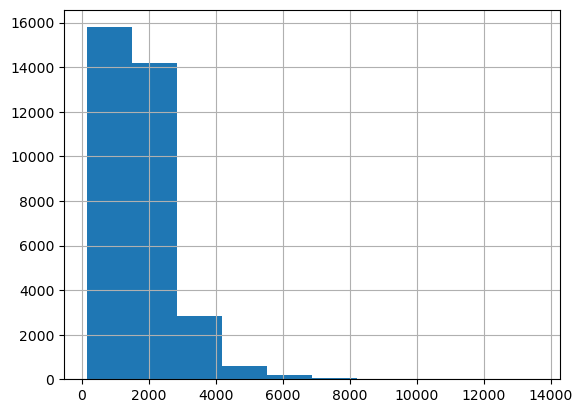

In [9]:
train.area.hist()

<AxesSubplot:>

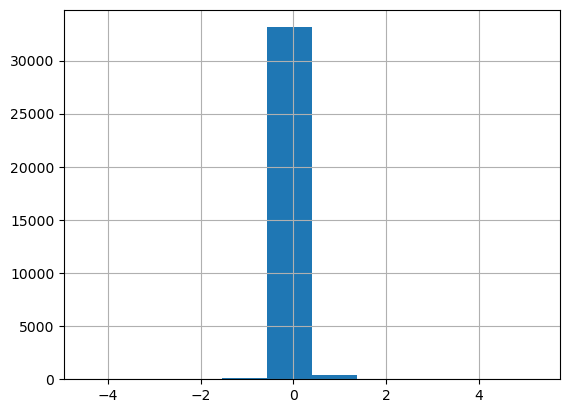

In [10]:
train.log_error.hist()

<AxesSubplot:xlabel='log_error', ylabel='area'>

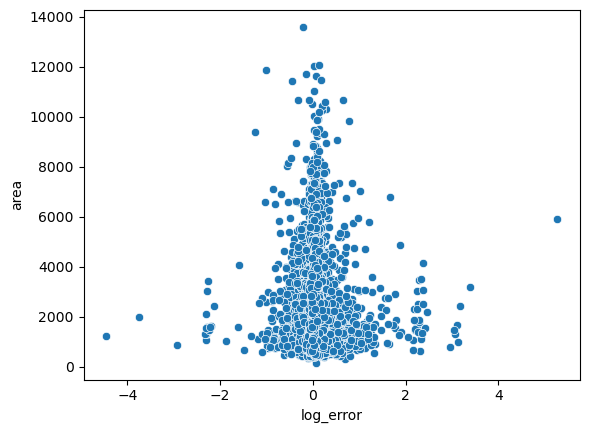

In [14]:
sns.scatterplot(data=train, x='log_error', y='area')

- Looks normally distibuted
- The majority of areas greater than 4000 tend to stay between -2 and 2 in log error

### Does property tax value effect log error?

In [15]:
def scale_my_data(train, validate, test):
    '''
    scale my data using minmaxscaler and add it back to my input datasets
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[['property_tax_val', 'log_error']])
    
    X_train_scaled = scaler.transform(train[['property_tax_val', 'log_error']])
    X_validate_scaled = scaler.transform(validate[['property_tax_val', 'log_error']])
    X_test_scaled = scaler.transform(test[['property_tax_val', 'log_error']])

    train[['property_tax_val_scaled', 'log_error_scaled']] = X_train_scaled
    validate[['property_tax_val_scaled', 'log_error_scaled']] = X_validate_scaled
    test[['property_tax_val_scaled', 'log_error_scaled']] = X_test_scaled
    return train, validate, test
train, validate, test = scale_my_data(train, validate, test)

<AxesSubplot:>

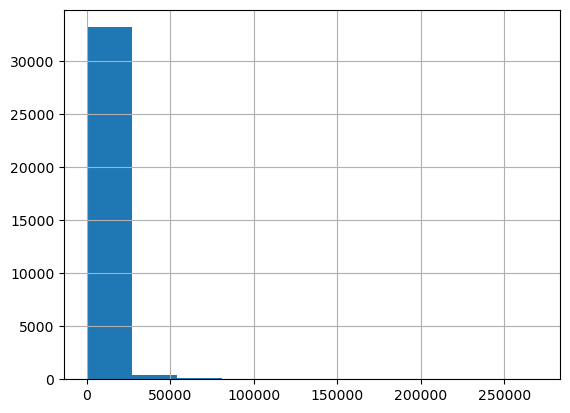

In [17]:
train.property_tax_val.hist()

<AxesSubplot:xlabel='log_error', ylabel='property_tax_val'>

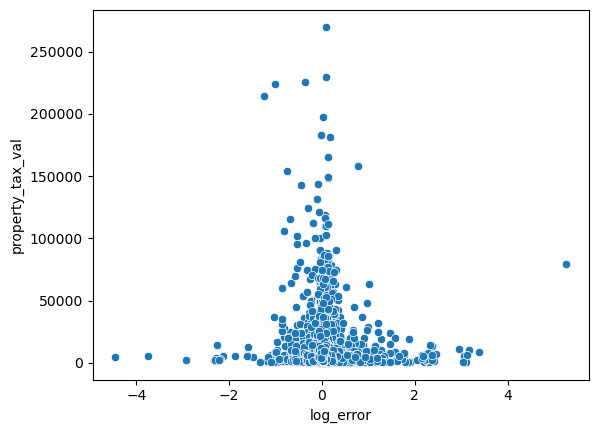

In [18]:
sns.scatterplot(data=train, x='log_error', y='property_tax_val')

- not exactly normally distributed, maybe left skew?
- properties with a tax value at about 5000 and below have more distributed log error values than properties with a tax value above 5000

### Does land use effect log error

<BarContainer object of 33699 artists>

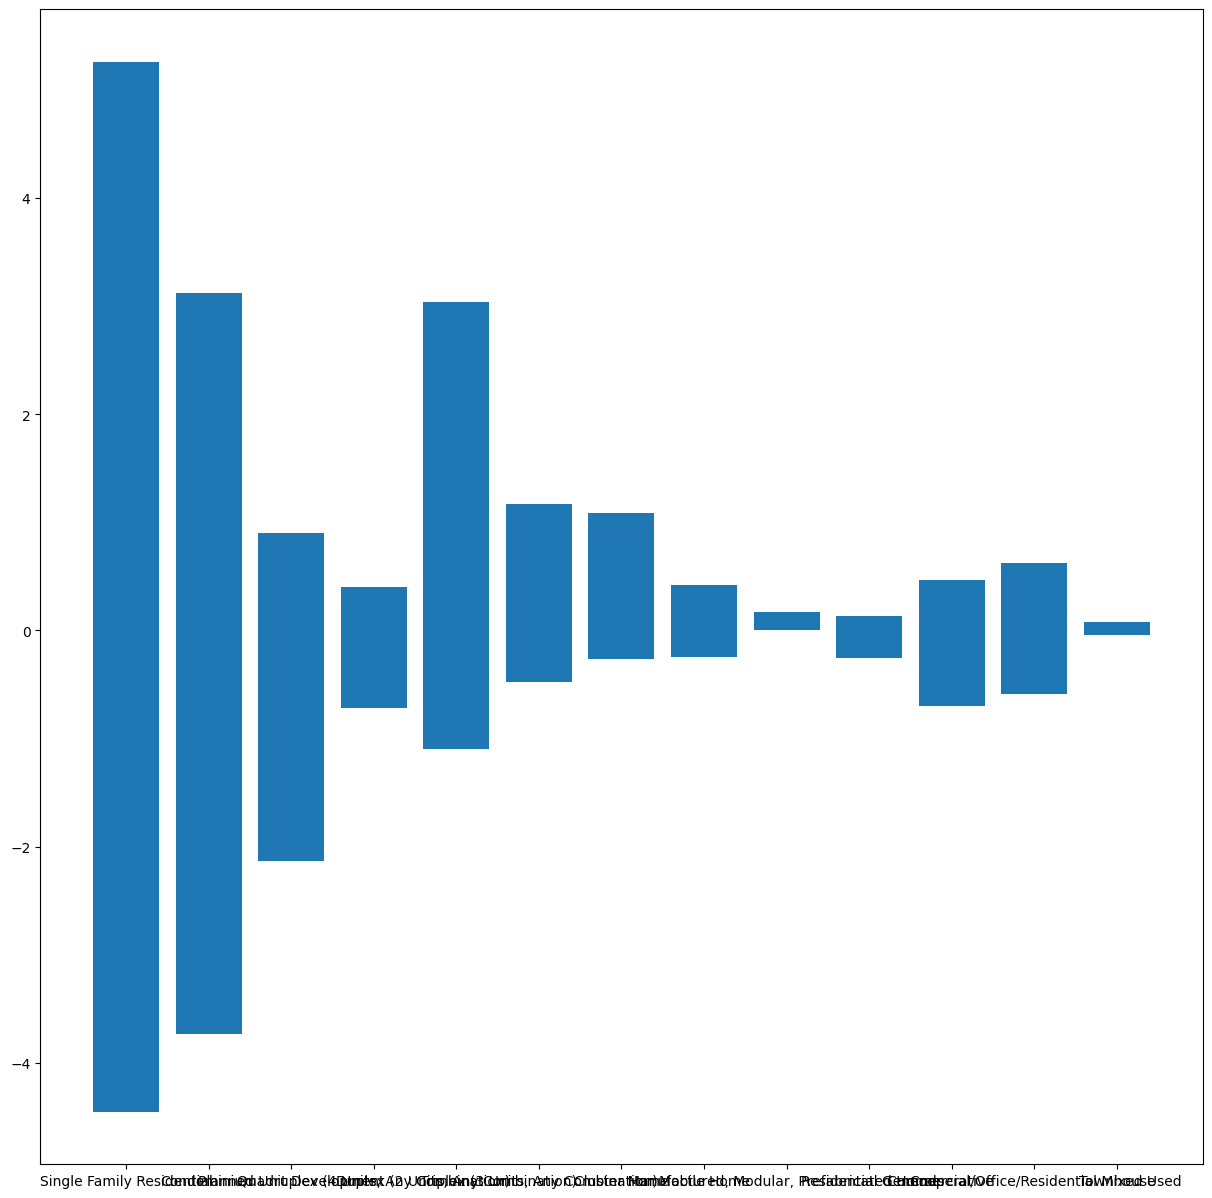

In [61]:
plt.figure(figsize=[15,15])
plt.bar(train.prop_land_use, train.log_error)

<AxesSubplot:xlabel='log_error', ylabel='prop_land_use'>

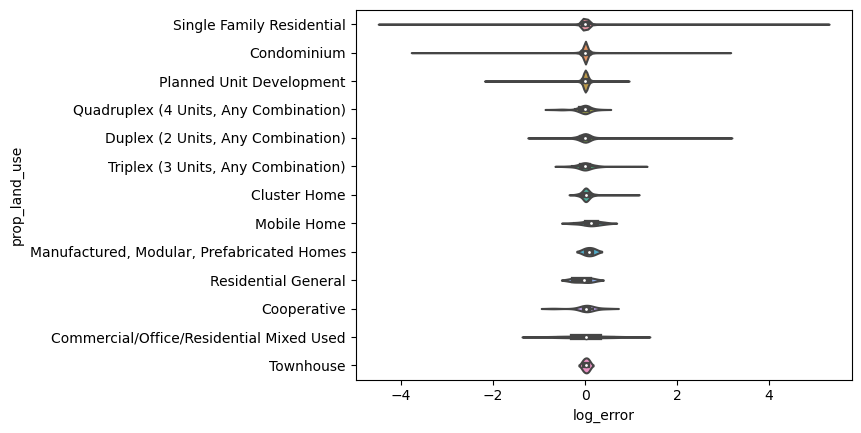

In [48]:
sns.violinplot(data=train, x='log_error', y='prop_land_use')

- single family residentials have the greatest log error distribution
    - condominiums, 2 unit duplexes, and planned unit development have the next greatest log error distributions
- townhouses have the smallest log error distribution
    - next smallest log error is manufactures homes, then residential general

### Does tax value and area effect error log of single family residential homes?

In [78]:
sfr = train[train.prop_land_use == 'Single Family Residential']

<AxesSubplot:xlabel='log_error', ylabel='property_tax_val'>

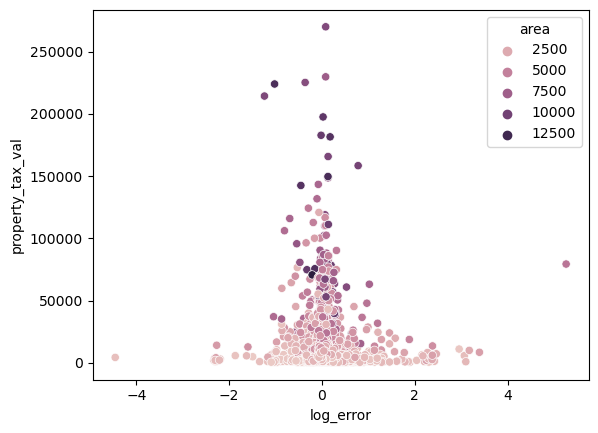

In [68]:
sns.scatterplot(data=sfr, x='log_error', y='property_tax_val', hue='area')

- properties with smaller area seem 
    - to be more abundant
    - have the greatest log error distribution
    - lower property value
    
- properties with larger area seem
    - to be more scarce
    - have a greater property tax value distribution
    - log error distribution stays between -2 and 2
    

In [76]:
train['area_bins'] = pd.cut(train.area,[0
                                        ,2500
                                        ,5000
                                        ,7500
                                        ,10000
                                        ,130000], labels=['2500_and_under'
                                                          , '2500-5000'
                                                          , '5000-7500'
                                                          , '7500-10000'
                                                          , '10000-130000'])

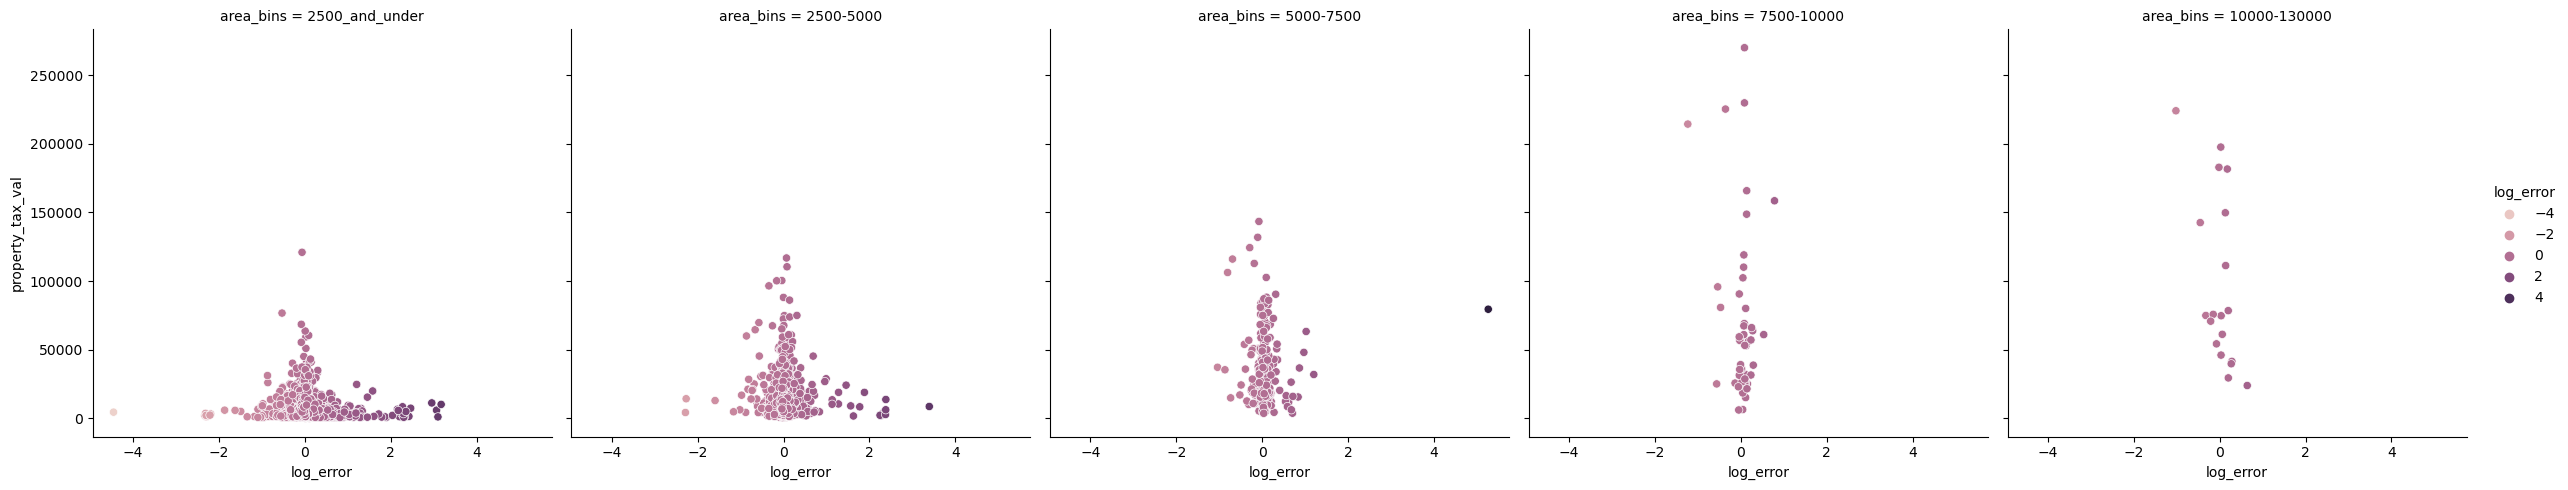

In [79]:
sns.relplot(data=sfr, x='log_error', y='property_tax_val', col='area_bins', hue='log_error')

- 2500 and under
    - looks normally distributed
    - log error has the greatest distribution in this bin

- 2500 - 5000
    - roughly normally distributed
        - might have a right skew
    - still a decent amount of log error value distribution

- 5000 - 7500
    - log error distribution starts to narrow down
    - outlier on the right?
    - 

- 7500 - 10000
    - is that an outlier on the top toward the left?
    - very slim log error distribution

10000 - 130000
    - kind of looks like '~' on its side

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60178 entries, 1 to 77379
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     60178 non-null  int64  
 1   parcel_id              60178 non-null  int64  
 2   bathroom_cnt           60178 non-null  float64
 3   bedroom_cnt            60178 non-null  float64
 4   building_quality_id    47079 non-null  float64
 5   area                   60177 non-null  float64
 6   fips                   60178 non-null  float64
 7   full_bath_cnt          60153 non-null  float64
 8   latitude               60178 non-null  float64
 9   longitude              60178 non-null  float64
 10  lot_area               57500 non-null  float64
 11  county_land_code       60178 non-null  object 
 12  prop_zoning            47404 non-null  object 
 13  census_tract_block_id  60178 non-null  float64
 14  city_id                59303 non-null  float64
 15  co